In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/iris (2).csv')

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)

In [ ]:
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default Random Forest Accuracy (n_estimators=10): {default_score:.4f}")

Default Random Forest Accuracy (n_estimators=10): 1.0000


In [ ]:
scores = []
n_range = range(1, 101)

In [ ]:
for n in n_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [ ]:
best_score = max(scores)
best_n = n_range[scores.index(best_score)]
print(f"Best Accuracy: {best_score:.4f} with n_estimators = {best_n}")

Best Accuracy: 1.0000 with n_estimators = 1


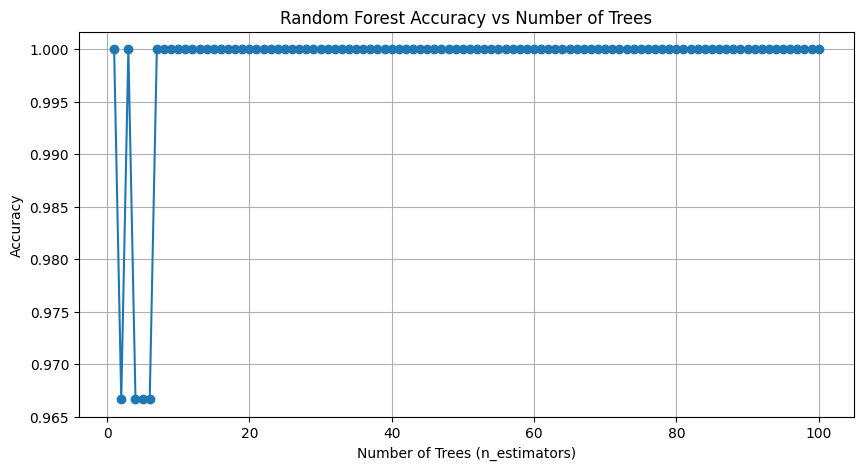

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(n_range, scores, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
rf_best = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best, labels=rf_best.classes_)
print("Confusion Matrix:")
print(pd.DataFrame(cm, index=rf_best.classes_, columns=rf_best.classes_))

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               10                0               0
Iris-versicolor            0                9               0
Iris-virginica             0                0              11
